In [2]:
import numpy as np
import matplotlib.pylab as pl

In [3]:
##### SYNTHETIC DATASET 2 #####

def load_synth2(n_tr, n_tst):
    """
    Generates data
        3 classes: layer of circular shapes
        Discriminative behavior for the first two components
        data points dimension is d=10

    PARAMETERS
    ----------
    n_tr :  int
            Number of training data points
    n_tst : int
            Number of testing data points

    RETURNS
    -------
    TR :    ndarray, shape (n_tr, 10)
            Training data
    TR_L :  ndarray, shape (n_tr,)
            Training label
    TST :   ndarray, shape (n_tst, 10)
            Testing data
    TST_L : ndarray, shape (n_tst,)
            Testing label
    """

    # generate circle dataset
    nz = 0.2

    t = np.random.rand(n_tr) * 2 * np.pi
    ys = np.floor((np.arange(n_tr) * 1.0 / n_tr * 3)) + 1
    xs = np.concatenate((np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
    xs = xs * ys.reshape(-1, 1) + nz * np.random.randn(n_tr, 2)

    t = np.random.rand(n_tst) * 2 * np.pi
    yt = np.floor((np.arange(n_tst) * 1.0 / n_tst * 3)) + 1
    xt = np.concatenate((np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
    xt = xt * yt.reshape(-1, 1) + nz * np.random.randn(n_tst, 2)

    nbnoise = 8

    xs = np.hstack((xs, np.random.randn(n_tr, nbnoise)))
    xt = np.hstack((xt, np.random.randn(n_tst, nbnoise)))

    return xs, ys, xt, yt

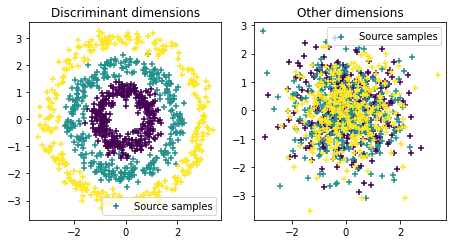

In [4]:
## plot training data
import matplotlib.pylab as pl

xs, ys, xt, yt = load_synth2(1000, 1000)

pl.figure(1, figsize=(6.4, 3.5))

pl.subplot(1, 2, 1)
pl.scatter(xs[:, 0], xs[:, 1], c=ys, marker='+', label='Source samples')
pl.legend(loc=0)
pl.title('Discriminant dimensions')

pl.subplot(1, 2, 2)
pl.scatter(xs[:, 2], xs[:, 3], c=ys, marker='+', label='Source samples')
pl.legend(loc=0)
pl.title('Other dimensions')
pl.tight_layout()

In [6]:
## Classification
## Radom data generation for each trial
## Total 100 trials

import WDAnepv as WDAnepv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

p = 2 # subspace dimension
d = 10 # dimension
k = 10 # Sinkhorn iteration number
reg = 0.1 # regularization parameter
n_iter = 100
acclist_nepv = []

for i in range(n_iter):
    # Obtain synthetic dataset
    xs, ys, xt, yt = load_synth2(1000, 1000)
    
    # Wasserstein Discriminant Analysis
    # PCA projection as initial projection
    pca = PCA(n_components=2)
    P0 = pca.fit_transform(xs.T)
    P0 /= np.sqrt(np.sum(P0**2, 0, keepdims=True))

    # Train (Solve WDA)
    P, Sub_Err, Norm_Err, WDA_Val, Dink_Val, proj, ITR, DINK_PROJ, PROJ = WDAnepv.wda_nepv(xs, ys, 2, P0, lamb=reg, e=0, k=10, tol=1e-3, maxitr=50) # WDAnepv
    # KNN models
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(proj(xs), ys)
    
    # Test
    predicted = model.predict(proj(xt))
    acc = accuracy_score(yt, predicted)
    
    # store accuracy
    acclist_nepv.append(acc)

In [7]:
print('WDAnepv mean:', np.mean(acclist_nepv), ' std:', np.std(acclist_nepv))

WDAnepv mean: 0.9644499999999999  std: 0.012071764576895962
